I'm referring to the slides NN_3
- The idea is using the figure 4.7 and simulate that neural network


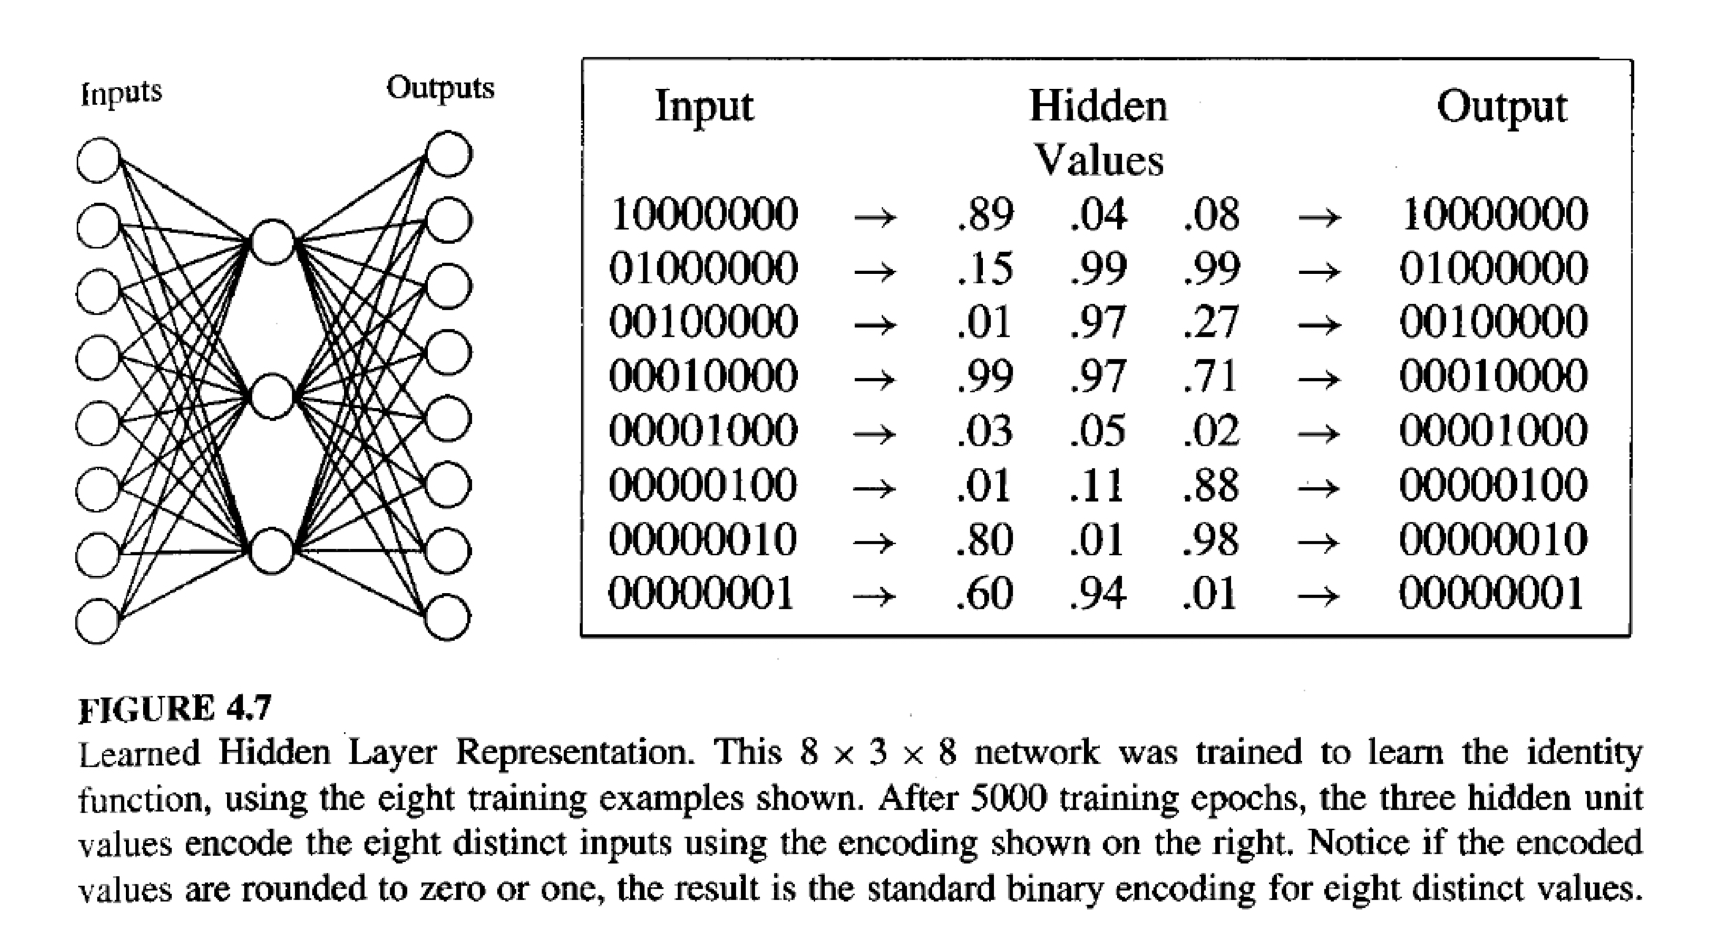

This neural network, with 8 input neurons, 3 hidden neurons, and 8 output neurons, was trained to learn the identity function.
it maps each input directly to the same output. The inputs are 8-bit binary vectors, each representing a unique pattern like `[1,0,0,0,0,0,0,0]`, and the output reproduces the exact input pattern

In [1]:
import numpy as np

we can use sigmoid, but nowadays ReLU is the most used

In [2]:
def sigm(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def derivativeSigmoid(x):
    return x * (1 - x)

In [4]:
def ReLU(x):
   return np.maximum(0, x)

In [5]:
def derivateReLU(x):
    return np.where(x > 0, 1, 0)

I'm going to put a "box" in order to change the function only one time

In [6]:
def activation(function: str, x):
  if (function.upper() == "SIGMOID"): return sigm(x)
  elif (function.upper() == "RELU"): return ReLU(x)

def Derivateactivation(function, x):
  if (function.upper() == "SIGMOID"): return derivativeSigmoid(x)
  elif (function.upper() == "RELU"): return derivateReLU(x)

we need data for training

In [7]:
inputs_data = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

outputs_data = inputs_data

Now we can initialize the NN parameters, we need to choose how many hidden layer and the size of them

We need to choose also the dimension of the input x


In our situation we are trying to do a 8x3x8 NN

In [38]:
input_size = inputs_data.shape[1]
hidden_units = 3
output_size = outputs_data.shape[1]
learning_rate = 0.001
epochs = 5000

Now it is the time for the weight, we need to initialize them kind of smaller randomly:

In [39]:
np.random.seed(42)
weight_in_hidden = np.random.uniform(size=(input_size, hidden_units))
bias_in_hidden = np.zeros((1, hidden_units))

we need to initialize the weight also for the hidden -> output

In [40]:
np.random.seed(43)
weight_hidden_out = np.random.uniform(size=(hidden_units, output_size))
bias_hidden_out = np.zeros((1, output_size))

In [41]:
function = "RELU" #comment the one you dont want to use
#function = "SIGMOID"
i = 0
for epoch in range(epochs):
    # Forward Pass -> trying to obtain y
    hidden_input = np.dot(inputs_data, weight_in_hidden) + bias_in_hidden
    hidden_output = activation(function, hidden_input)
    if (i == 0):
       print(hidden_output)
       i += 1
    # Forward Pass -> trying to obtain z
    output_input = np.dot(hidden_output, weight_hidden_out) + bias_hidden_out
    output_output = activation(function, output_input)

    error = outputs_data - output_output
    output_delta = error * Derivateactivation(function,output_output)

    # Backward Pass -> trying to get the weight for the last layer
    hidden_error = output_delta.dot(weight_hidden_out.T)
    hidden_delta = hidden_error * Derivateactivation(function,hidden_output)

    weight_hidden_out += hidden_output.T.dot(output_delta) * learning_rate
    bias_hidden_out += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    weight_in_hidden += inputs_data.T.dot(hidden_delta) * learning_rate
    bias_in_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]]


now it is the moment to see the information of the hidden values

In [42]:
hidden_values = sigm(np.dot(inputs_data, weight_in_hidden) + bias_in_hidden)
print("Hidden Values:")
print(hidden_values)

Hidden Values:
[[0.50002141 0.58689848 0.58857053]
 [0.73537735 0.49996514 0.46326158]
 [0.49995928 0.68779542 0.49998778]
 [0.51333198 0.47019252 0.66311446]
 [0.7221129  0.49994579 0.46893303]
 [0.58626897 0.49996825 0.65280776]
 [0.67623589 0.68543485 0.52104528]
 [0.53666874 0.51725239 0.5079336 ]]


as we notice by learning an appropriate representation in a smaller-dimensional space, the network can still recover the original data.
Theoretically each of these should be a different encoding


In [43]:
print(np.where(hidden_values < 0.5, 0, 1))

[[1 1 1]
 [1 0 0]
 [0 1 0]
 [1 0 1]
 [1 0 0]
 [1 0 1]
 [1 1 1]
 [1 1 1]]
